In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/niyat/OneDrive/Desktop/finalml/sales_data_sample.csv",encoding = 'ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [10]:
numeric_df = df.select_dtypes(include = ['number'])

<Axes: >

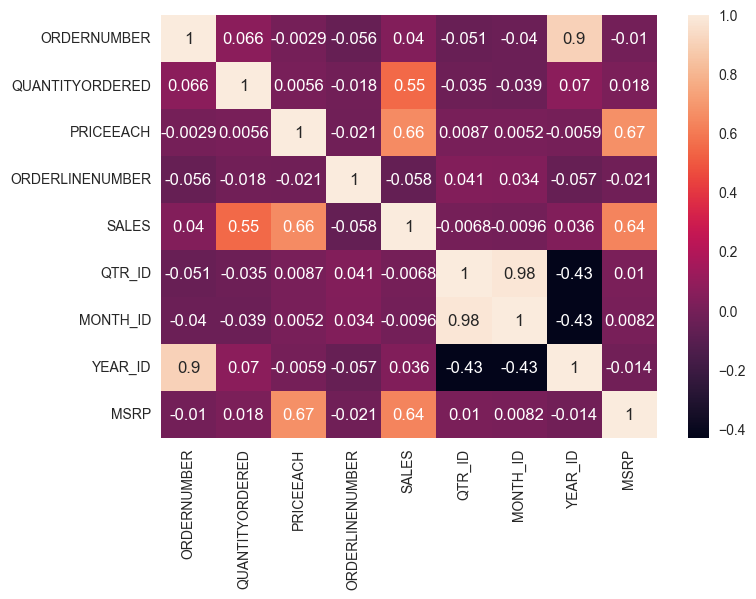

In [11]:
sns.heatmap(numeric_df.corr(),annot = True)

In [12]:
df_drop = ['CUSTOMERNAME','PHONE','ORDERDATE','STATUS','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERNUMBER']

In [13]:
df = df.drop(df_drop,axis = 1)

In [14]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,1,3,2005,Ships,54,S72_3212,France,Small


In [15]:
country = pd.get_dummies(df['COUNTRY'])
dealsize = pd.get_dummies(df['DEALSIZE'])
productline = pd.get_dummies(df['PRODUCTLINE'])

In [16]:
df = pd.concat([df,country,dealsize,productline],axis = 1)

In [17]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,Ships,54,S72_3212,...,False,False,True,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,1,1,2005,Ships,54,S72_3212,...,False,True,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,1,3,2005,Ships,54,S72_3212,...,False,True,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,1,3,2005,Ships,54,S72_3212,...,False,False,True,False,False,False,True,False,False,False


In [18]:
df = df.drop(columns = ['COUNTRY','DEALSIZE','PRODUCTLINE'])

In [19]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,S10_1678,False,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2,5,2003,95,S10_1678,False,...,False,False,True,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,3,7,2003,95,S10_1678,False,...,False,True,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,3,8,2003,95,S10_1678,False,...,False,True,False,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,4,10,2003,95,S10_1678,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,S72_3212,False,...,False,False,True,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,1,1,2005,54,S72_3212,False,...,False,True,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,1,3,2005,54,S72_3212,False,...,False,True,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,1,3,2005,54,S72_3212,False,...,False,False,True,False,False,False,True,False,False,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   QTR_ID            2823 non-null   int64  
 5   MONTH_ID          2823 non-null   int64  
 6   YEAR_ID           2823 non-null   int64  
 7   MSRP              2823 non-null   int64  
 8   PRODUCTCODE       2823 non-null   object 
 9   Australia         2823 non-null   bool   
 10  Austria           2823 non-null   bool   
 11  Belgium           2823 non-null   bool   
 12  Canada            2823 non-null   bool   
 13  Denmark           2823 non-null   bool   
 14  Finland           2823 non-null   bool   
 15  France            2823 non-null   bool   
 16  Germany           2823 non-null   bool   


In [21]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   QTR_ID            2823 non-null   int64  
 5   MONTH_ID          2823 non-null   int64  
 6   YEAR_ID           2823 non-null   int64  
 7   MSRP              2823 non-null   int64  
 8   PRODUCTCODE       2823 non-null   int8   
 9   Australia         2823 non-null   bool   
 10  Austria           2823 non-null   bool   
 11  Belgium           2823 non-null   bool   
 12  Canada            2823 non-null   bool   
 13  Denmark           2823 non-null   bool   
 14  Finland           2823 non-null   bool   
 15  France            2823 non-null   bool   
 16  Germany           2823 non-null   bool   


In [23]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,False,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2,5,2003,95,0,False,...,False,False,True,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,3,7,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,3,8,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,4,10,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,108,False,...,False,False,True,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,1,1,2005,54,108,False,...,False,True,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,1,3,2005,54,108,False,...,False,True,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,1,3,2005,54,108,False,...,False,False,True,False,False,False,True,False,False,False


In [24]:
WCSS = []

In [25]:
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df)
    distortions.append(kmean.inertia_)

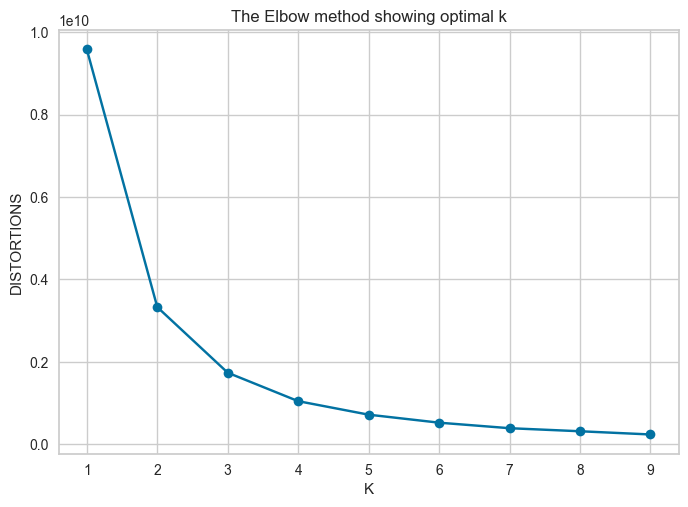

In [26]:
plt.plot(K,distortions,'bo-')
plt.xlabel('K')
plt.ylabel('DISTORTIONS')
plt.title('The Elbow method showing optimal k')
plt.show()

In [27]:
km  = KMeans(n_clusters=3)
y_means = km.fit_predict(df)

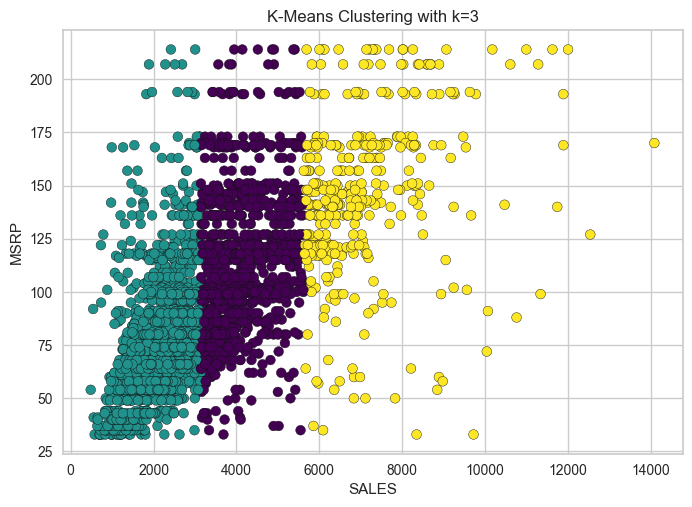

In [32]:
plt.scatter(df['SALES'],df['MSRP'],c=y_means,cmap = 'viridis',edgecolor = 'k')
plt.xlabel('SALES')
plt.ylabel('MSRP')
plt.title('K-Means Clustering with k=3')
plt.legend()
plt.show()

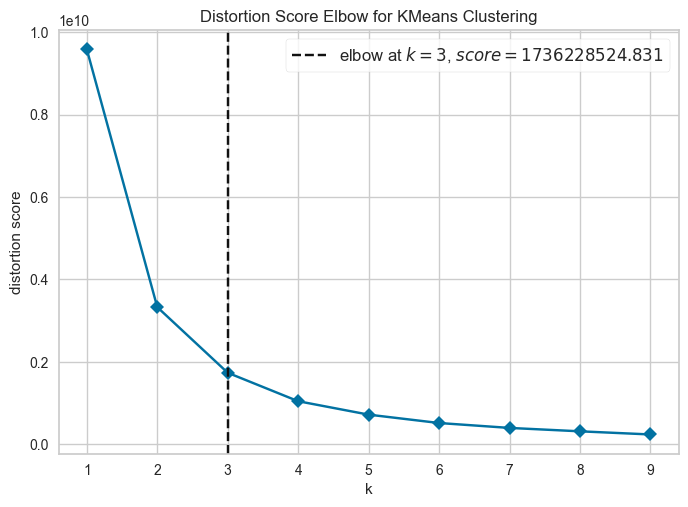

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings = False)
visualizer.fit(df)
visualizer.show()

<Axes: >

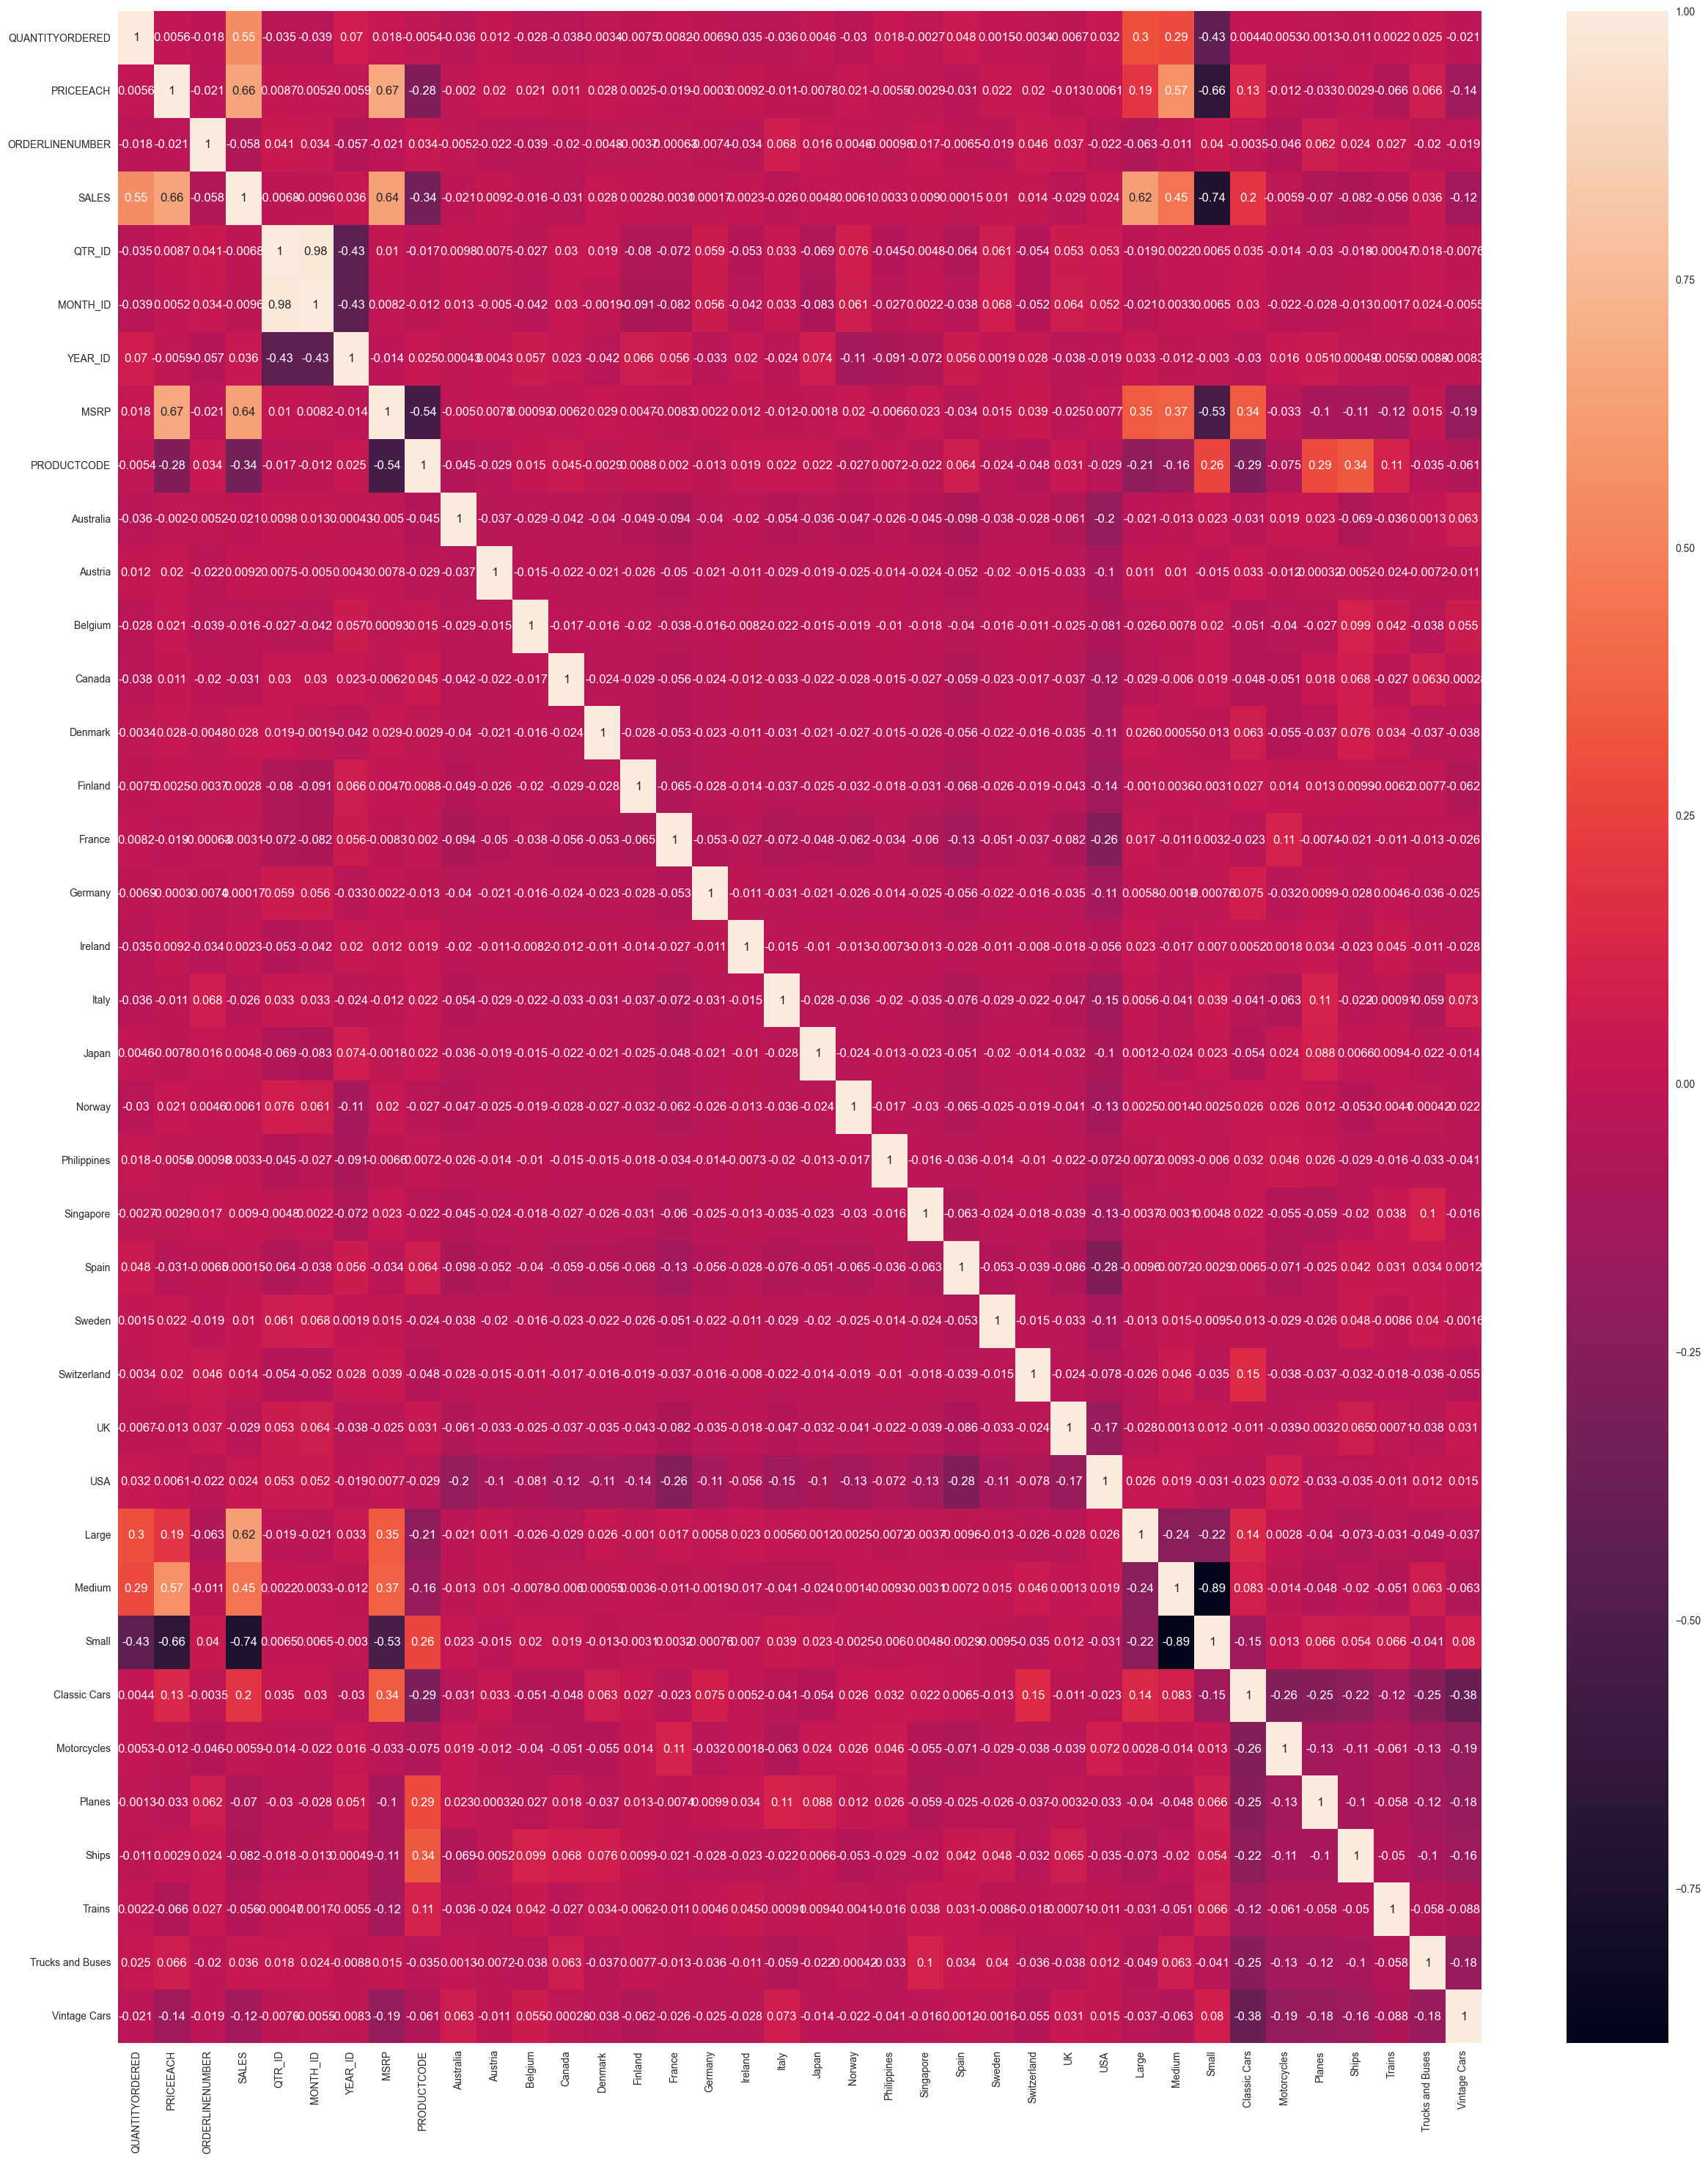

In [40]:
plt.figure(figsize=(30,36))
sns.heatmap(df.corr(),annot = True)

In [35]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [37]:
df_x = pd.DataFrame(scaled_df,columns = df.columns)

In [38]:
print(df_x)

      QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES    QTR_ID  \
0            0.263736   0.941193         0.058824  0.175644  0.000000   
1            0.307692   0.744940         0.235294  0.167916  0.333333   
2            0.384615   0.928063         0.058824  0.250150  0.666667   
3            0.428571   0.771061         0.294118  0.240030  0.666667   
4            0.472527   1.000000         0.764706  0.347273  1.000000   
...               ...        ...              ...       ...       ...   
2818         0.153846   1.000000         0.823529  0.129572  1.000000   
2819         0.252747   1.000000         0.000000  0.257074  0.000000   
2820         0.406593   1.000000         0.176471  0.362882  0.000000   
2821         0.307692   0.483589         0.000000  0.120143  0.000000   
2822         0.450549   0.528446         0.470588  0.190969  0.333333   

      MONTH_ID  YEAR_ID      MSRP  PRODUCTCODE  Australia  ...  Large  Medium  \
0     0.090909      0.0  0.342541         